In [ ]:
# CREATE PREDICTION FOR the 10th week, 30th week, 40th week

In [ ]:
'''!pip install pandas  seaborn  matplotlib statsmodels numpy openpyxl scikit-learn'''

'!pip install pandas  seaborn  matplotlib statsmodels numpy openpyxl scikit-learn'

In [ ]:
import pandas as pd
import os

import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose


# To ignore all warnings
warnings.filterwarnings("ignore")

# Or to ignore specific warnings by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#df=pd.read_excel(r"t1_germany_files/shipment_complete_data_active_lane.xlsx")
df=pd.read_excel('/content/shipment_complete_data_active_lane.xlsx')
# os.listdir()

In [ ]:
high_lanes = ['DE02_29142970', 'DE02_29145063', 'DE08_29144124', 'DE05_29724961', 'DE08_29222753', 'DE08_29242683', 'DE05_29146035', 'DE08_29292703', 'DE05_29546496', 'DE02_29626095', 'DE08_29142964', 'DE08_29144781', 'DE08_29143647', 'DE08_29143519']
high_lanes

['DE02_29142970',
 'DE02_29145063',
 'DE08_29144124',
 'DE05_29724961',
 'DE08_29222753',
 'DE08_29242683',
 'DE05_29146035',
 'DE08_29292703',
 'DE05_29546496',
 'DE02_29626095',
 'DE08_29142964',
 'DE08_29144781',
 'DE08_29143647',
 'DE08_29143519']

In [ ]:
'''df['Lane']=df['Lane'].astype('str')
df.groupby('Lane')['shipment'].sum().sort_values().tail(7).index.tolist()'''

"df['Lane']=df['Lane'].astype('str')\ndf.groupby('Lane')['shipment'].sum().sort_values().tail(7).index.tolist()"

In [ ]:
df_h = df[df['Lane'].isin(high_lanes)]
print(len(df_h))

2912


In [ ]:
df2 = df_h[df_h['Lane'].isin(high_lanes)][['date','shipment','Lane']]  #timeseries data

# Convert the datetime column to datetime format (if necessary)
df2['date'] = pd.to_datetime(df2['date'])

# Set the datetime column as the index
df2 = df2.set_index('date')

print(df2.sort_values(by='Lane'))

            shipment           Lane
date                               
2020-01-06        11  DE02_29142970
2022-07-18        22  DE02_29142970
2022-07-25        15  DE02_29142970
2022-08-01        18  DE02_29142970
2022-08-08        12  DE02_29142970
...              ...            ...
2021-05-24         7  DE08_29292703
2021-05-31         0  DE08_29292703
2021-06-07        10  DE08_29292703
2021-12-20        11  DE08_29292703
2023-12-25         8  DE08_29292703

[2912 rows x 2 columns]


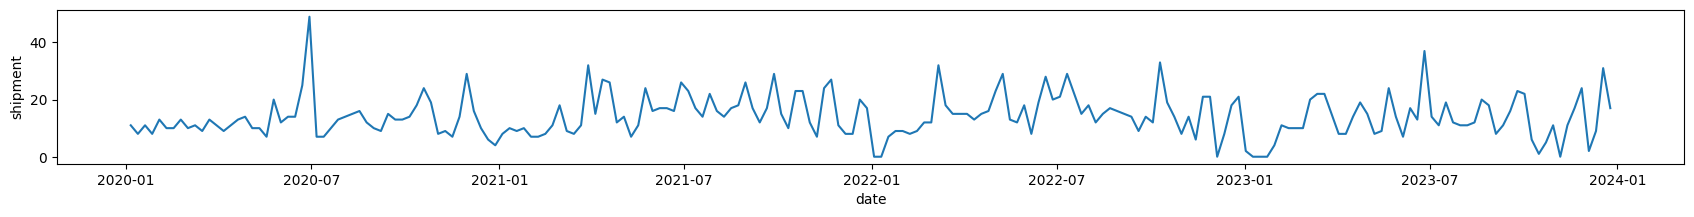

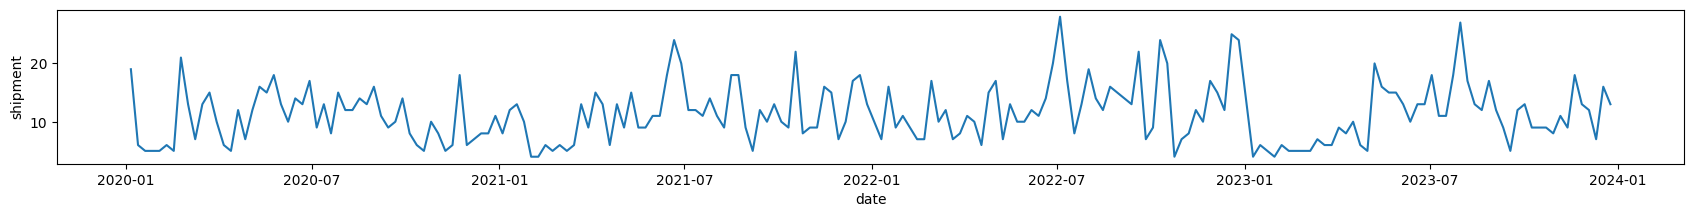

In [ ]:
# prompt: create a lineplot with hue=Column2, index=column1 and plit of column3 pandas


for lane in df2['Lane'].unique()[:2]:
  plt.figure(figsize=(21,2))
  data=df2[df2['Lane']==lane]
  sns.lineplot(
      x=data.index,
      y=data['shipment']
  )
  plt.show()



In [ ]:
sarimax_params = {
    "DE02_29142970": {
        "lane": "DE02_29142970",
        "best_params": (0, 0, 0, 0, 1, 1, 52),  # complete iterations
        "error": "33%"
    },
    "DE02_29145063": {
        "lane": "DE02_29145063",
        "best_params": (0, 0, 0, 1, 0, 2, 52),  # complete iterations
        "error": "27%"
    },
    "DE05_29146035": {
        "lane": "DE05_29146035",
        "best_params": (0, 0, 1, 0, 1, 1, 52),  # stopped iterations at 4
        "error": "48%"
    },
    "DE05_29546496": {
        "lane": "DE05_29546496",
        "best_params": (0, 0, 0, 1, 0, 1, 52),  # complete iterations
        "error": "41.41%"
    },
    "DE08_29222753": {
        "lane": "DE08_29222753",
        "best_params": (0, 0, 0, 1, 1, 2, 13),  # complete iterations
        "error": "45.83%"
    },
    "DE05_29724961": {
        "lane": "DE05_29724961",
        "best_params": (0, 0, 0, 0, 1, 2, 52),  # stopped at 4 iterations - despite low accuracy
        "error": "45%"
    },
    "DE08_29144124": {
        "lane": "DE08_29144124",
        "best_params": (0, 0, 0, 1, 0, 0, 52),  # stopped iterations at 5 - despite low accuracy
        "error": "59%"
    },
    "DE02_29626095": {
        "lane": "DE02_29626095",
        "best_params": (0, 0, 1, 1, 1, 0, 52),  # executed all iterations
        "error": "40"
    },
    "DE08_29142964": {
        "lane": "DE08_29142964",
        "best_params": (0, 0, 1, 0, 1, 1, 52), # RUNNING AGAIN---> didnt converge
        "error": "60"
    },
    "DE08_29242683": {
        "lane": "DE08_29242683",
        "best_params": (2, 1, 1, 1, 0, 1, 52), # executed all iterations
        "error": "55%"
    },
    "DE08_29292703": {
        "lane": "DE08_29292703",
        "best_params": (0,0,2,1,0,2,52), # executed all iterations
        "error": "45%"
    },
    "DE08_29143647": {
        "lane": "DE08_29143647",
        "best_params": (2,1,0,1,0,0,52), # executed all iterations
        "error": "55%"
    },
    "DE08_29144781": {
        "lane": "DE08_29144781",
        "best_params": (0, 0, 0, 0, 1, 0, 52), # ongoing
        "error": "35%"
    },

    "DE08_29143519": {
        "lane": "DE08_29143519",
        "best_params": (0, 0, 0, 1, 0, 1, 52), # iterations timd out
        "error": "55%"
    }

}


# Printing the dictionary
for lane, details in sarimax_params.items():
    print(f"For Lane {details['lane']}:")
    #print(f"Best Parameters: SARIMAX{details['best_params']}")
    #print(f"Error: {details['error']}")
    print()

For Lane DE02_29142970:

For Lane DE02_29145063:

For Lane DE05_29146035:

For Lane DE05_29546496:

For Lane DE08_29222753:

For Lane DE05_29724961:

For Lane DE08_29144124:

For Lane DE02_29626095:

For Lane DE08_29142964:

For Lane DE08_29242683:

For Lane DE08_29292703:

For Lane DE08_29143647:

For Lane DE08_29144781:

For Lane DE08_29143519:



In [ ]:
'''# for each week ->
for each lane ->
get the best model ->
fit for w minus2 ->
make forecast for w ->
keep track in dataframe -|'''

'# for each week ->\nfor each lane ->\nget the best model ->\nfit for w minus2 ->\nmake forecast for w ->\nkeep track in dataframe -|'

In [ ]:
## DEIFNING THE DATES NEEDED TO BE FORECASTED

w= 30
yr=2023
df_h

date_points= [w-2,w-1,w,w+1, w+11,w+12,w+13,w+14, w+16]

dates = df_h[(df_h['week'].isin(date_points)) *(df_h['year']==yr)]['date'].unique()
dates

numpy.datetime64('2023-07-10T00:00:00.000000000')

['DE08_29144781', 'DE08_29143519']
Iterating over lanes...
Date is 2023-07-10T00:00:00.000000000
Processing lane: DE08_29144781
SARIMAX parameters: (0, 0, 0, 0, 1, 0, 52)
Forecast dates: 2 steps
Fitting SARIMAX model...


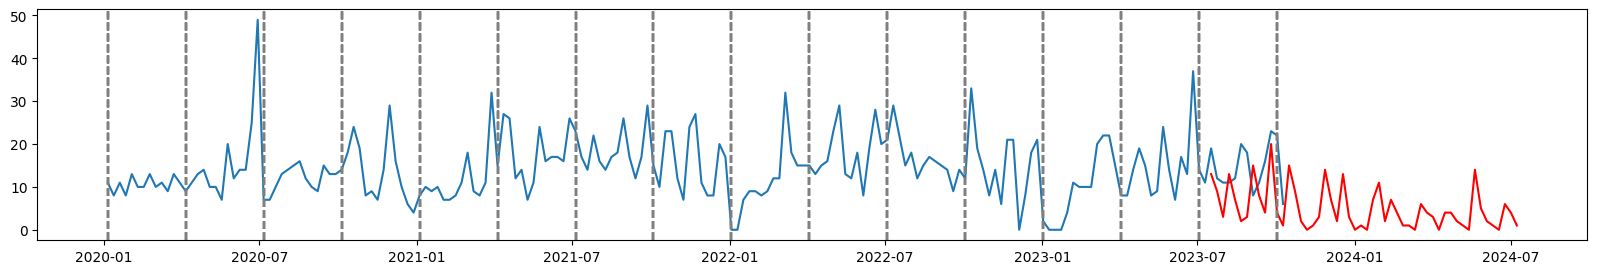

Results: [{'Lane': 'DE08_29144781', 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'), 'Forecast': 9.0}]
Processing lane: DE08_29143519
SARIMAX parameters: (0, 0, 0, 1, 0, 1, 52)
Forecast dates: 2 steps
Fitting SARIMAX model...


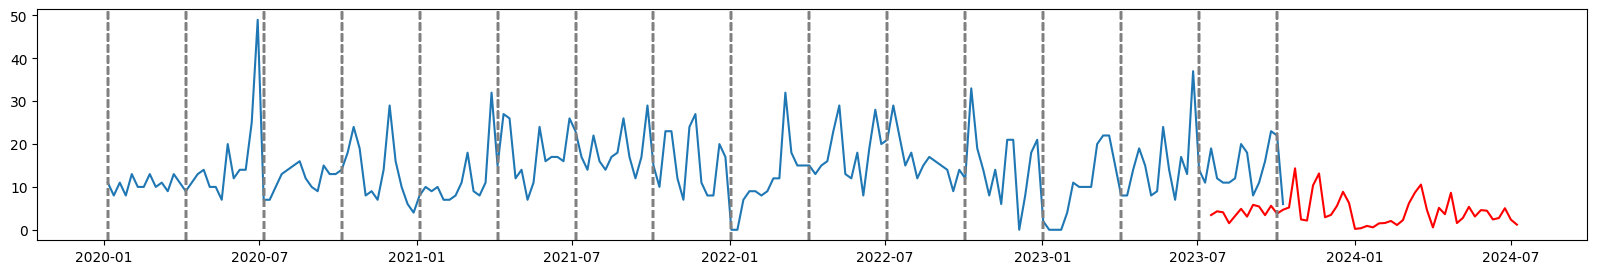

Results: [{'Lane': 'DE08_29144781', 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'), 'Forecast': 9.0}, {'Lane': 'DE08_29143519', 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'), 'Forecast': 4.310186612627143}]
Date is 2023-07-17T00:00:00.000000000
Processing lane: DE08_29144781
SARIMAX parameters: (0, 0, 0, 0, 1, 0, 52)
Forecast dates: 2 steps
Fitting SARIMAX model...


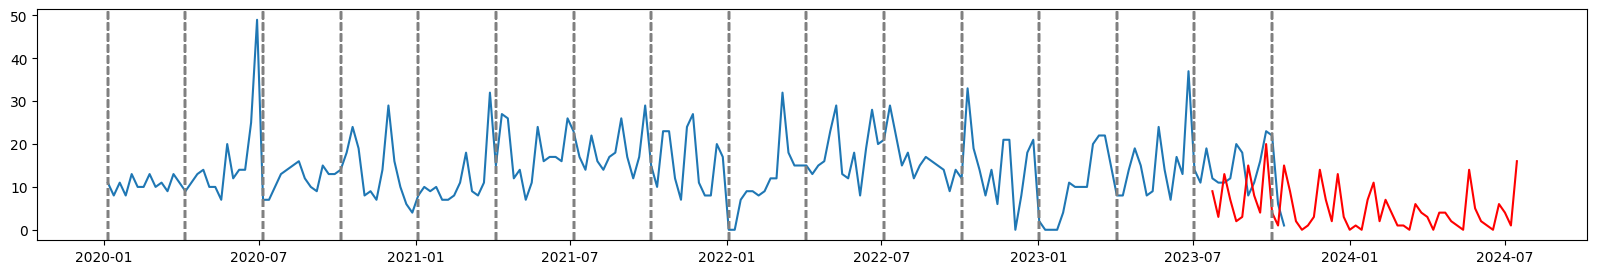

Results: [{'Lane': 'DE08_29144781', 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'), 'Forecast': 9.0}, {'Lane': 'DE08_29143519', 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'), 'Forecast': 4.310186612627143}, {'Lane': 'DE08_29144781', 'Date': numpy.datetime64('2023-07-17T00:00:00.000000000'), 'Forecast': 3.0}]
Processing lane: DE08_29143519
SARIMAX parameters: (0, 0, 0, 1, 0, 1, 52)
Forecast dates: 2 steps
Fitting SARIMAX model...


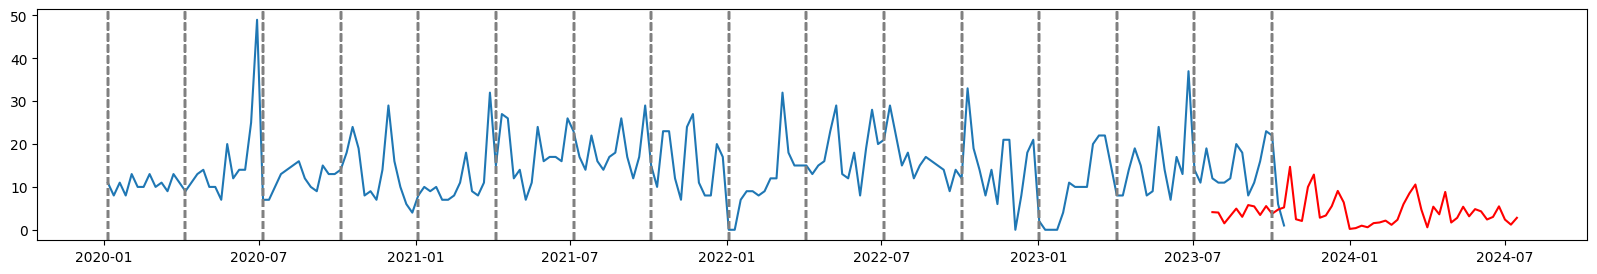

Results: [{'Lane': 'DE08_29144781', 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'), 'Forecast': 9.0}, {'Lane': 'DE08_29143519', 'Date': numpy.datetime64('2023-07-10T00:00:00.000000000'), 'Forecast': 4.310186612627143}, {'Lane': 'DE08_29144781', 'Date': numpy.datetime64('2023-07-17T00:00:00.000000000'), 'Forecast': 3.0}, {'Lane': 'DE08_29143519', 'Date': numpy.datetime64('2023-07-17T00:00:00.000000000'), 'Forecast': 4.021529377914562}]
                     Lane  Forecast
Date                               
2023-07-10  DE08_29144781  9.000000
2023-07-10  DE08_29143519  4.310187
2023-07-17  DE08_29144781  3.000000
2023-07-17  DE08_29143519  4.021529


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

# Function to fit SARIMAX model and make forecast
def fit_model_and_forecast(data, params):
    print("Fitting SARIMAX model...")

    model = SARIMAX(data, order=params[:3], seasonal_order=params[3:])
    fit_model = model.fit(disp=False)
    forecast = fit_model.forecast(steps=52)

    #print("Forecast:", forecast)
    return forecast

# Function to iterate over lanes, fit model, make forecast, and log results
def iterate_lanes(lanes, dates, data, sarimax_params):
    print("Iterating over lanes...")
    results = []
    for date in dates:
        print(f"Date is {date}")
        for lane in lanes:

            print("Processing lane:", lane)
            lane_data = data[data['Lane']==lane][['shipment']].loc[:date]

            params = sarimax_params[lane]["best_params"]
            print("SARIMAX parameters:", params)
            print("Forecast dates:", "2 steps")

            forecast = fit_model_and_forecast(lane_data, params) #, forecast_dates[-1])


            ####plotting
            plt.figure(figsize=(20,3))

            train_len=lane_data.shape[0]
            plt_data = data[:train_len+13]

            plt.plot(plt_data.index, plt_data['shipment'], label='Original')
            plt.plot(forecast.index , forecast, color='red', label='Forecast')

            for pp in range(0, len(data), 13):
                plt.axvline(data.index[pp], color='gray', linestyle='--')

            plt.show()

            ######## RESULTS ARE STORED IN HERE
            results.append({"Lane": lane, "Date": date, "Forecast": forecast[:2][-1]})
            print("Results:", results)
    return results

# List of lanes
lanes = list(sarimax_params.keys())
lanes=['DE08_29144781','DE08_29143519']


print(lanes)

# Logging results into a pandas DataFrame
results = iterate_lanes(lanes, dates[:2], df2, sarimax_params)
results_df = pd.DataFrame(results).set_index('Date')

# Printing the results DataFrame
print(results_df)


In [ ]:
data.head(2)

,shipment,Lane
date,,
2020-01-06,1,DE08_29292703
2020-01-13,5,DE08_29292703


In [ ]:
results_df=results_df.sort_values(by='Lane')
results_df.head(3)

,Lane,Forecast
Date,,
2023-07-10,DE02_29142970,16.666457
2023-07-31,DE02_29142970,15.999797
2023-10-23,DE02_29142970,9.999926


In [ ]:
results_df

,Lane,Forecast
Date,,
2023-07-10,DE02_29142970,16.666457
2023-07-31,DE02_29142970,15.999797
2023-10-23,DE02_29142970,9.999926
2023-10-16,DE02_29142970,9.333210
2023-10-30,DE02_29142970,12.333047
...,...,...
2023-07-24,DE08_29292703,2.723552
2023-11-13,DE08_29292703,8.429074
2023-10-09,DE08_29292703,6.557649


In [ ]:
pred_dates = df_h[(df_h['week'].isin([x+2 for x in date_points])) *(df_h['year']==yr)]['date'].unique()
print(pred_dates)


og_df=df2[df2['Lane'].isin(lanes) * df2.index.isin(pred_dates)].sort_values(by='Lane')
og_df.head(3)

['2023-07-24T00:00:00.000000000' '2023-07-31T00:00:00.000000000'
 '2023-08-07T00:00:00.000000000' '2023-08-14T00:00:00.000000000'
 '2023-10-23T00:00:00.000000000' '2023-10-30T00:00:00.000000000'
 '2023-11-06T00:00:00.000000000' '2023-11-13T00:00:00.000000000'
 '2023-11-27T00:00:00.000000000']


,shipment,Lane
date,,
2023-07-24,12,DE02_29142970
2023-07-31,11,DE02_29142970
2023-08-07,11,DE02_29142970


In [ ]:
#df2.index[-30:]

In [ ]:
import numpy as np

final = pd.concat([og_df.reset_index(),results_df.reset_index()], axis=1,)
final['abs_error'] = np.abs(final['Forecast']-final['shipment'])
final['abs_error_perc'] = np.abs(final['Forecast']-final['shipment'])*100/final['shipment']

final

,date,shipment,Lane,Date,Lane,Forecast,abs_error,abs_error_perc
0,2023-07-24,12,DE02_29142970,2023-07-10,DE02_29142970,16.666457,4.666457,38.887142
1,2023-07-31,11,DE02_29142970,2023-07-31,DE02_29142970,15.999797,4.999797,45.452696
2,2023-08-07,11,DE02_29142970,2023-10-23,DE02_29142970,9.999926,1.000074,9.091578
3,2023-08-14,12,DE02_29142970,2023-10-16,DE02_29142970,9.333210,2.666790,22.223246
4,2023-10-23,5,DE02_29142970,2023-10-30,DE02_29142970,12.333047,7.333047,146.660930
...,...,...,...,...,...,...,...,...
121,2023-08-14,4,DE08_29292703,2023-07-24,DE08_29292703,2.723552,1.276448,31.911195
122,2023-10-23,7,DE08_29292703,2023-11-13,DE08_29292703,8.429074,1.429074,20.415336
123,2023-10-30,2,DE08_29292703,2023-10-09,DE08_29292703,6.557649,4.557649,227.882447
124,2023-11-06,16,DE08_29292703,2023-07-31,DE08_29292703,8.248442,7.751558,48.447235


In [ ]:
final=final.loc[:, ~final.columns.duplicated()]


In [ ]:
#### NEW LANES ADDED
#final[final['Lane'].isin(['DE02_29626095','DE08_29142964','DE08_29242683'])]


In [ ]:
'''OVERALL FORMULA FOR ACCURACY | ACROSS ALL 3 MEASUREMETS'''

####### ACTUAL FORMULA




a=final['abs_error'].sum()
b=final['shipment'].sum()
print("The overall addition formula error is ",a,",", b , "," ,a/b)


# WEIGHTED ABSOLUTE ERROR
non_inf_df= final[final['abs_error_perc']<5000]
print(f" non inf values in error percent are {len(non_inf_df)}")

a = (non_inf_df['abs_error']*non_inf_df['shipment']).sum()
b = non_inf_df['shipment'].sum()
print(a/b)



The overall addition formula error is  87.34066727532638 , 153 , 0.5708540344792574
 non inf values in error percent are 18
6.195092047161704


In [ ]:
for date in final.date.unique():

  print("\n")
  print(f"The date is {str(date)[:10]}")

  final2=final[final['date']==date] # final['abs_error_perc']<5000

  #error1 - custom formula
  a=final2['abs_error'].sum()
  b=final2['shipment'].sum()

  print(a,",", b , "," ,a/b)
  print("\n")


  # error2 - WEIGHTED ABSOLUTE ERROR

  a = (final2['abs_error']*final2['shipment']).sum()
  b = final2['shipment'].sum()
  print(a/b)





The date is 2023-07-24
7.918433929238304 , 18 , 0.4399129960687947


5.228650602123817


The date is 2023-11-13
14.593601662905515 , 17 , 0.8584471566415008


7.643967710495668


The date is 2023-11-06
11.221933349674536 , 17 , 0.6601137264514433


8.845665960608923


The date is 2023-10-30
9.663481724076169 , 3 , 3.2211605746920564


5.106158871769163


The date is 2023-11-27
28.115351235491318 , 43 , 0.6538453775695655


14.297221499466813


The date is 2023-08-14
11.745613126189802 , 15 , 0.7830408750793202


6.810818837360178


The date is 2023-08-07
9.862345819918644 , 21 , 0.46963551523422115


5.283223727574627


The date is 2023-07-31
7.423941704129362 , 9 , 0.8248824115699291


1.1199448083368455


The date is 2023-10-23
5.195406784673905 , 10 , 0.5195406784673905


2.0326983941985146


In [ ]:
final

,date,shipment,Lane,Date,Forecast,abs_error,abs_error_perc
0,2023-07-24,12,DE02_29142970,2023-07-10,16.666457,4.666457,38.887142
1,2023-07-31,11,DE02_29142970,2023-07-31,15.999797,4.999797,45.452696
2,2023-08-07,11,DE02_29142970,2023-10-23,9.999926,1.000074,9.091578
3,2023-08-14,12,DE02_29142970,2023-10-16,9.333210,2.666790,22.223246
4,2023-10-23,5,DE02_29142970,2023-10-30,12.333047,7.333047,146.660930
...,...,...,...,...,...,...,...
121,2023-08-14,4,DE08_29292703,2023-07-24,2.723552,1.276448,31.911195
122,2023-10-23,7,DE08_29292703,2023-11-13,8.429074,1.429074,20.415336
123,2023-10-30,2,DE08_29292703,2023-10-09,6.557649,4.557649,227.882447
124,2023-11-06,16,DE08_29292703,2023-07-31,8.248442,7.751558,48.447235


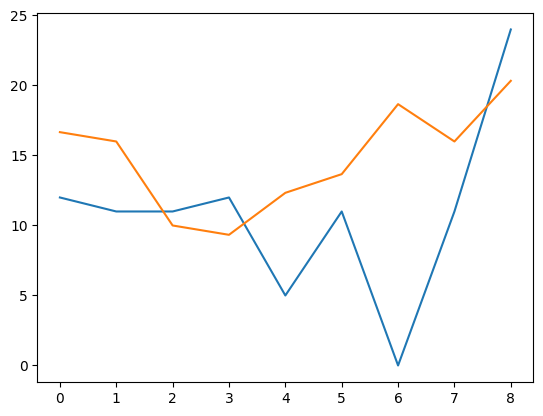

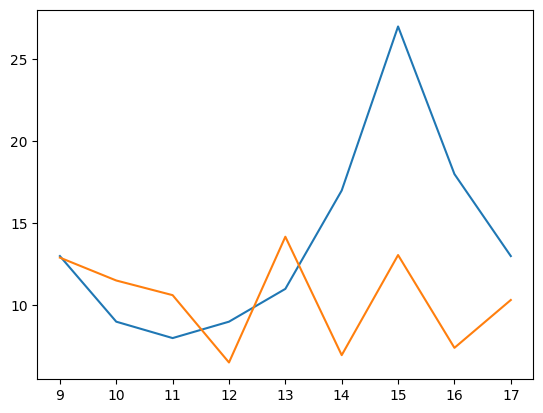

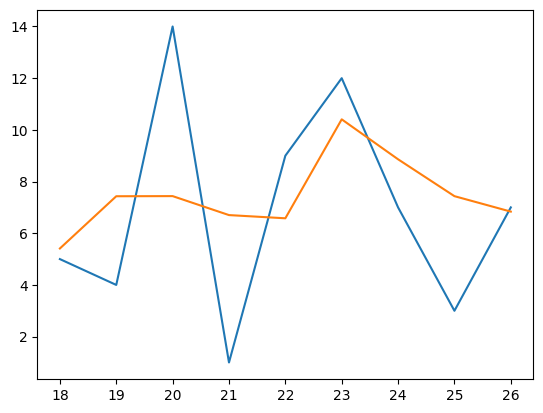

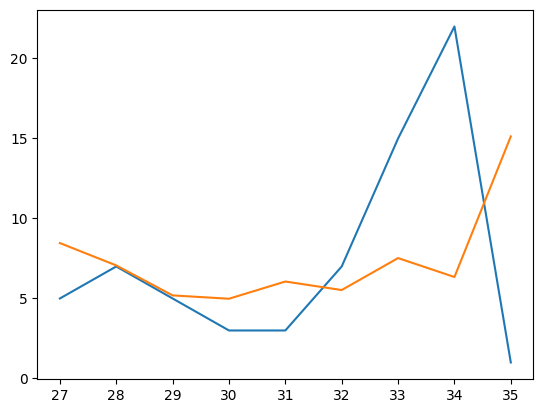

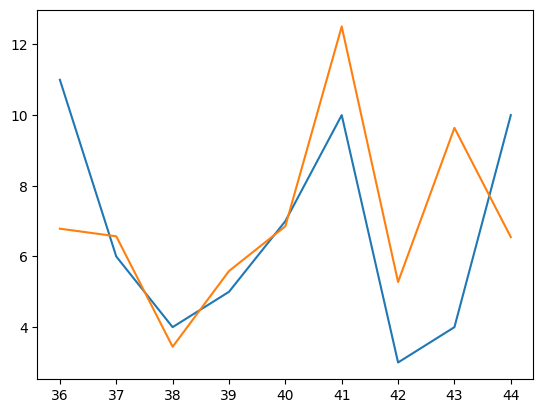

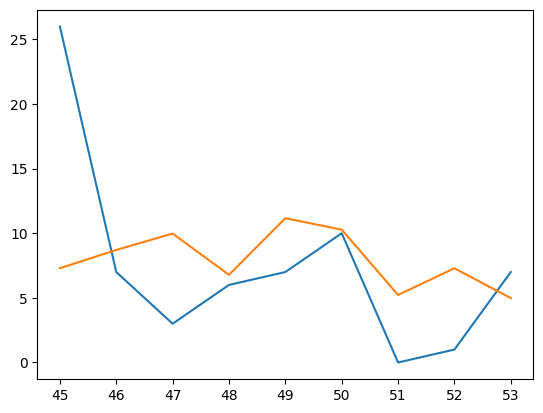

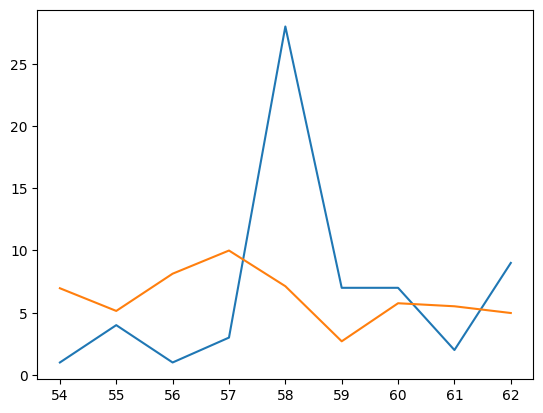

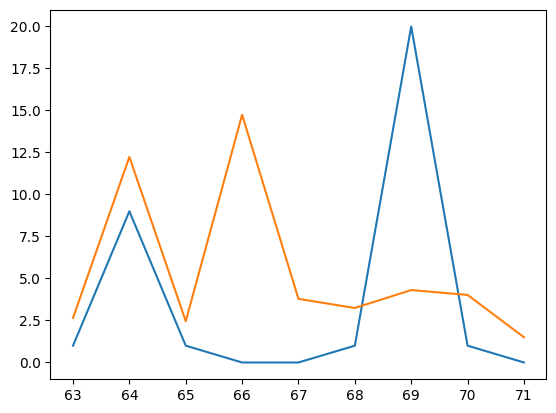

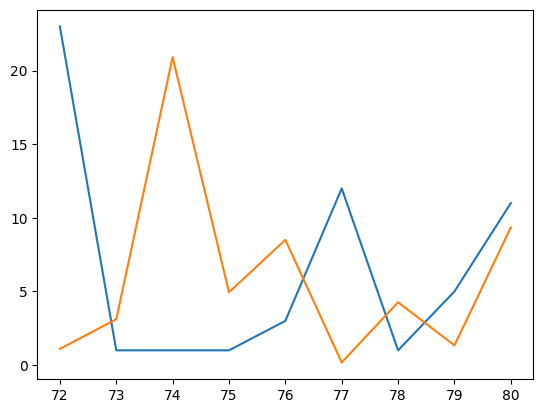

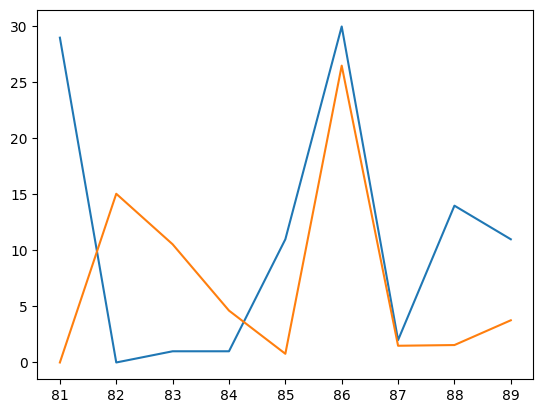

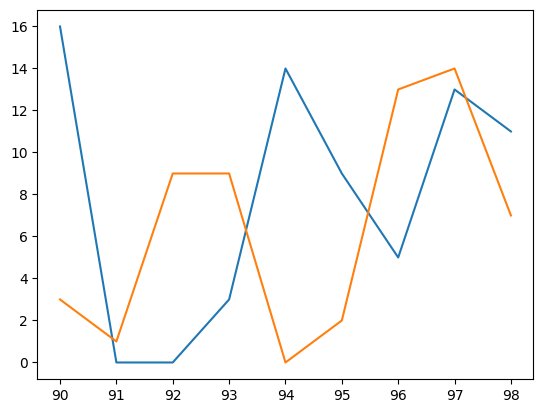

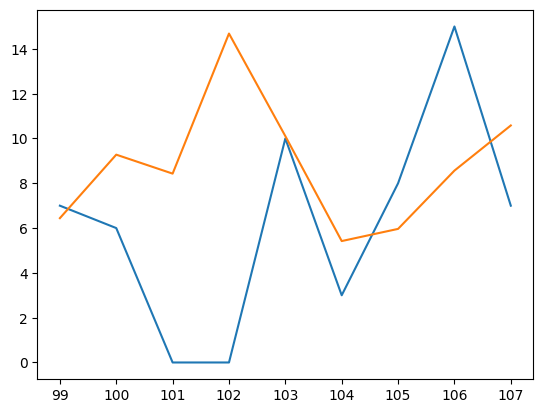

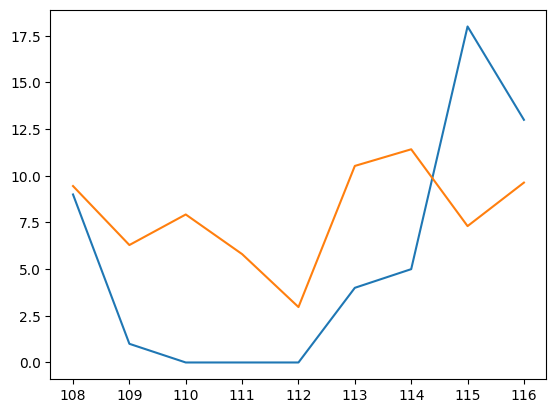

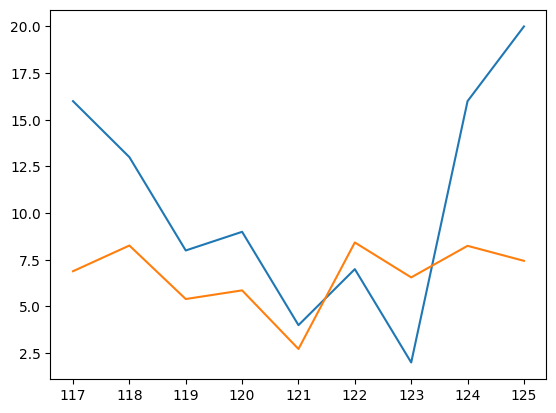

In [ ]:
for lane in final['Lane'].unique():
  data=final[final['Lane']==lane][['shipment','Forecast']]
  plt.plot(data['shipment'])
  plt.plot(data['Forecast'])
  plt.show()

In [ ]:
#final.to_excel('results_14lanes.xlsx')

In [ ]:
######## NEXT STEPS ::::::

'''1. If 10 week forecast is important ---->>> THEN GET THE MODEL WITH BETTER LONG TERM accuracy //not only w+2

1.5 Also have the kfolds split to identify best training data

1. best params were trained on 160 points # roughly till week 8 2023
2. the actual training can be done dynamically for 8th,30th,40th
3. LSTM models can be built

4. explore overfitting : check AIC'''



In [ ]:
##################################

CREATE LSTM MODEL FOR REMAINING 7 LANES

WE CAN MAKE 10 MODELS FOR EACH LANE (based on rolling window training) ->> TO MAKE ACTUAL PREDICTION FOR Wth week

##################################